In [ ]:
pip install pyforest

In [ ]:
import pyforest
import warnings
warnings.filterwarnings('ignore')
netflix_df=pd.read_csv('/content/netflix_titles.csv')
netflix_df.head()

<IPython.core.display.Javascript object>

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
netflix_df.shape

(7787, 12)

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# iterating the columns
for col in netflix_df.columns:
    print(col)

show_id
type
title
director
cast
country
date_added
release_year
rating
duration
listed_in
description


In [ ]:
netflix_df.director.fillna("No Director")
netflix_df.cast.fillna("No Cast")
netflix_df.country.fillna("Country Unavailable")
netflix_df.dropna(subset=["date_added", "rating"])
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


 Since “director,” “cast,” and “country” contain the majority of null values, we chose to treat each missing value is unavailable. The other two label “date_added” and “rating” contain an insignificant portion of the data, so it drops from the datase

In [ ]:
# into a proper date-time format

netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])
netflix_df.head()

<IPython.core.display.Javascript object>

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#Adding one more feature
netflix_df['month_added'] = netflix_df['date_added'].dt.month
netflix_df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.0


In [ ]:
#Renaming the ‘listed_in’ feature to the genre for easy use
netflix_df = netflix_df.rename(columns={"listed_in":"genre"})
netflix_df['genre'] =netflix_df['genre'].apply(lambda x: x.split(",")[0])
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,month_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...,8.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,12.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",12.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.0


#Exploratory Analysis and Visualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

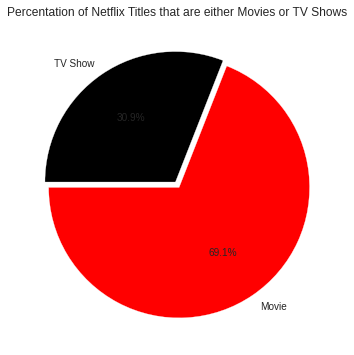

In [ ]:
#compareing the total number of movies and shows in this dataset to know which one is the majority.
plt.figure(figsize=(12,6))

plt.title("Percentation of Netflix Titles that are either Movies or TV Shows")

g = plt.pie(netflix_df.type.value_counts(),explode=(0.025,0.025), labels=netflix_df.type.value_counts().index, colors=['red','black'],autopct='%1.1f%%', startangle=180)

plt.show()

There are  more movie titles (68,5%) than TVshows titles (31,5%) in terms of title.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

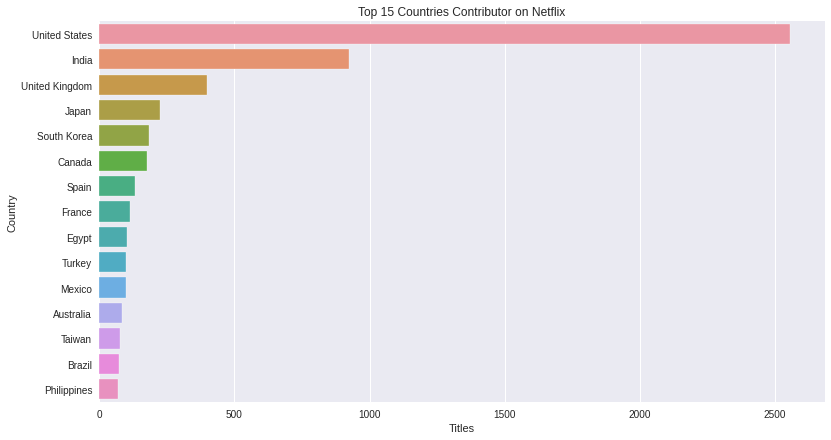

In [ ]:
countries = netflix_df.set_index('title').country
countries = countries[countries != 'Country Unavailable']
plt.figure(figsize=(13,7))
g = sns.countplot(y = countries, order=countries.value_counts().index[:15])
plt.title('Top 15 Countries Contributor on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

From the images above, we can see the top 15 countries contributor to Netflix. The country by the amount of the produces content is the United States

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

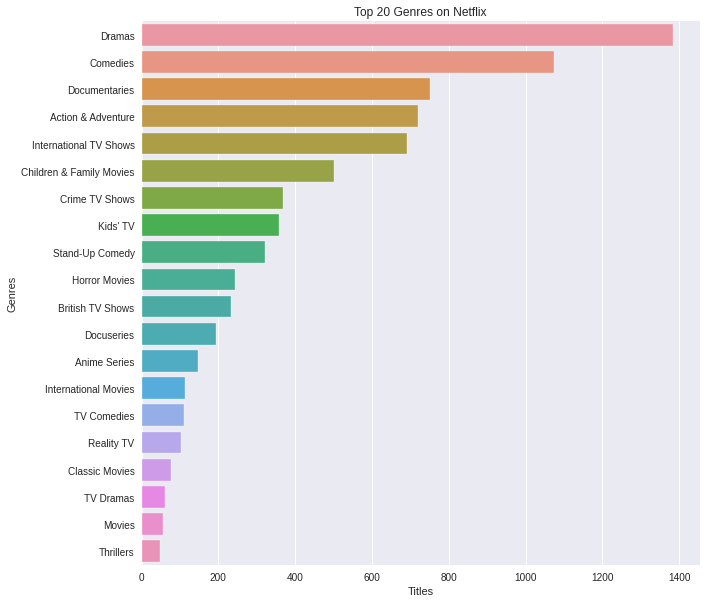

In [ ]:
filtered_genres = netflix_df.set_index('title').genre
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

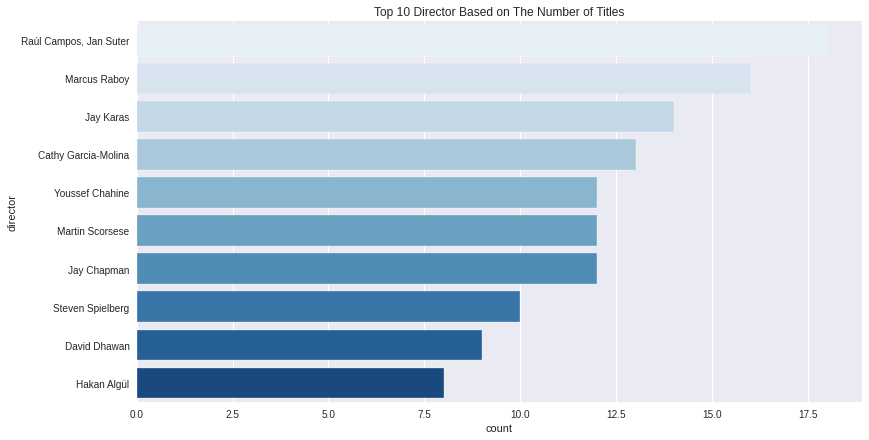

In [ ]:
directors = netflix_df[netflix_df.director != 'No Director'].set_index('title').director
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = directors, order=directors.value_counts().index[:10], palette='Blues')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

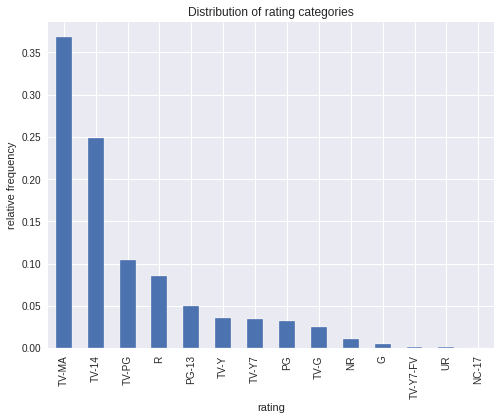

In [ ]:
plt.figure(figsize=(8,6))
netflix_df['rating'].value_counts(normalize=True).plot.bar()
plt.title('Distribution of rating categories')
plt.xlabel('rating')
plt.ylabel('relative frequency')
plt.show()

after expecting the distribution of rating ctegories, it is abvious that TV-MA is the mode
TV-14 comes in the second place and so on...

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

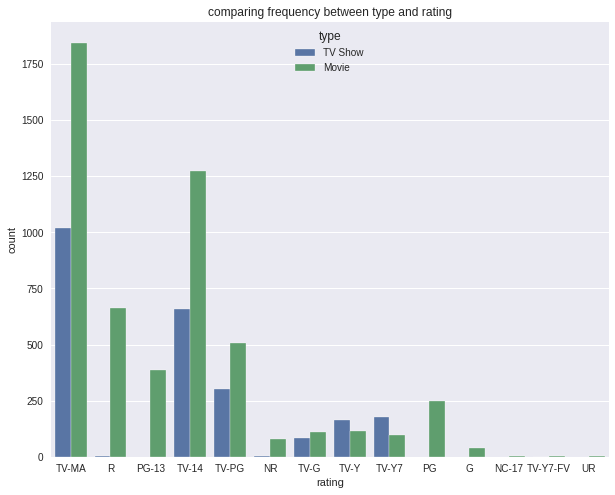

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=netflix_df)
plt.title('comparing frequency between type and rating')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

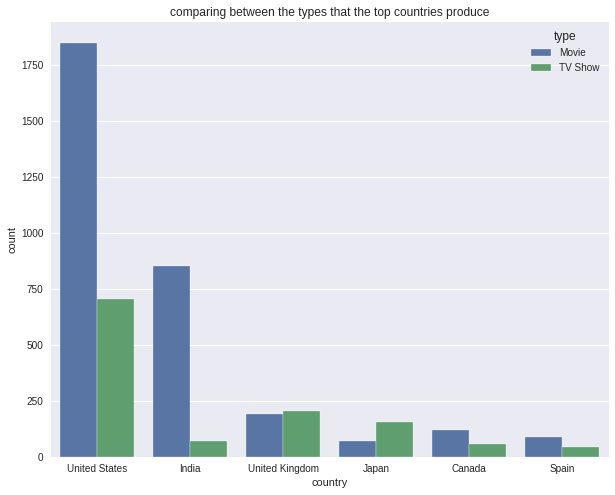

In [ ]:
top_productive_countries=netflix_df[(netflix_df['country']=='United States')|(netflix_df['country']=='India')|(netflix_df['country']=='United Kingdom')|(netflix_df['country']=='Japan')|
                             (netflix_df['country']=='Canada')|(netflix_df['country']=='Spain')]
plt.figure(figsize=(10,8))
sns.countplot(x='country',hue='type',data=top_productive_countries)
plt.title('comparing between the types that the top countries produce')
plt.show()

In [ ]:
for i in top_productive_countries['country'].unique():
    print(i)
    print(top_productive_countries[top_productive_countries['country']==i]['rating'].value_counts(normalize=True)*100)
    print('-'*10)

United States
TV-MA       34.482759
TV-14       14.811912
R           14.263323
TV-PG        9.443574
PG-13        8.894984
PG           5.642633
TV-Y7        3.644201
TV-Y         3.173981
TV-G         3.017241
NR           1.371473
G            1.136364
UR           0.039185
NC-17        0.039185
TV-Y7-FV     0.039185
Name: rating, dtype: float64
----------
India
TV-14       56.338028
TV-MA       24.702059
TV-PG       14.409534
TV-Y7        1.191766
TV-G         0.975081
TV-Y         0.650054
NR           0.541712
PG-13        0.433369
PG           0.325027
R            0.216685
TV-Y7-FV     0.108342
UR           0.108342
Name: rating, dtype: float64
----------
United Kingdom
TV-MA    42.317380
TV-PG    18.639798
TV-14    17.128463
R         7.808564
TV-G      5.289673
TV-Y      4.030227
PG-13     1.763224
NR        1.259446
TV-Y7     1.259446
PG        0.503778
Name: rating, dtype: float64
----------
Japan
TV-MA    36.444444
TV-14    34.222222
TV-PG    17.333333
TV-Y7     7.555556
P

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

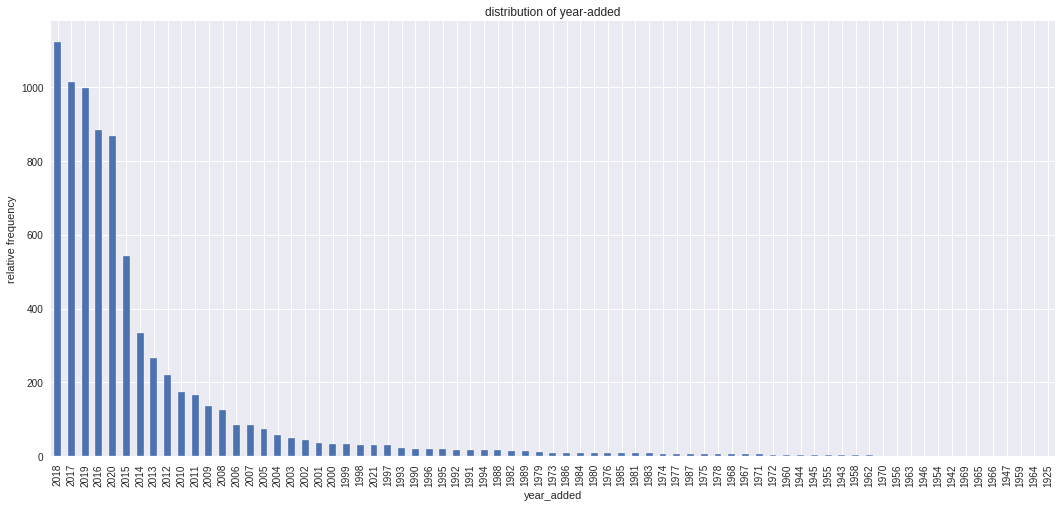

In [ ]:
plt.figure(figsize=(18,8))
netflix_df['release_year'].value_counts().plot.bar()
plt.title('distribution of year-added')
plt.ylabel('relative frequency')
plt.xlabel('year_added')
plt.show()

2018 is remarkable year for netflix

If a producer wants to release a show which month is the best month to release it.
The best month to release content so the producer can gain much revenue. Most of the holidays came in December month so to releases a Movie or TV show in December is the best way to earn a lot of profit as the whole family will be spending time with each other and watching shows.


In [ ]:
df_month = pd.DataFrame(netflix_df.month_added.value_counts()).reset_index().rename(columns={'index':'month','month_added':'count'})
# converting month number to month name
df_month['month_final'] = df_month['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
df_month[:10]

<IPython.core.display.Javascript object>

,month,count,month_final
0,12.0,833,Dec
1,10.0,785,Oct
2,1.0,757,Jan
3,11.0,738,Nov
4,3.0,669,Mar
5,9.0,619,Sep
6,8.0,618,Aug
7,4.0,601,Apr
8,7.0,600,July
9,5.0,543,May


Here we can see december has more movies than other months

# EDA of netflix.originals

In [ ]:
pip install autoviz

In [ ]:
df=pd.read_csv("/content/NetflixOriginals.csv")
import autoviz
import warnings
warnings.filterwarnings('ignore')

#importing Autoviz class
from autoviz.AutoViz_Class import AutoViz_Class#Instantiate the AutoViz class
AV = AutoViz_Class()
df.head()

<IPython.core.display.Javascript object>

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [ ]:
df.shape

(584, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [ ]:
df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [ ]:
# into a proper date-time format
df["Premiere"] = pd.to_datetime(df['Premiere'])
df.head()

<IPython.core.display.Javascript object>

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi


In [ ]:
#Adding one more feature
df['year_added'] = df['Premiere'].dt.year
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year_added
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020


In [ ]:
df.year_added.unique()

array([2019, 2020, 2018, 2021, 2016, 2017, 2015, 2014])

In [ ]:
df.year_added.value_counts()

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: year_added, dtype: int64

In [ ]:
df.Language.unique()

array(['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi',
       'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French',
       'English/Spanish', 'Portuguese', 'Filipino', 'German', 'Polish',
       'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Japanese',
       'Spanish/Basque', 'Spanish/Catalan', 'English/Swedish',
       'English/Taiwanese/Mandarin', 'Thia/English', 'English/Mandarin',
       'Georgian', 'Bengali', 'Khmer/English/French', 'English/Hindi',
       'Tamil', 'Spanish/English', 'English/Korean', 'English/Arabic',
       'English/Russian', 'English/Akan', 'English/Ukranian/Russian'],
      dtype=object)

In [ ]:
df["Language"].value_counts()

English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Japanese                        6
Korean                          6
German                          5
Turkish                         5
English/Spanish                 5
Polish                          3
Marathi                         3
Dutch                           3
Filipino                        2
English/Hindi                   2
English/Mandarin                2
English/Japanese                2
Thai                            2
English/Akan                    1
Malay                           1
Spanish/English                 1
Georgian                        1
English/Taiwanese/Mandarin      1
English/Korean                  1
Khmer/English/French            1
Spanish/Catalan                 1
Swedish                         1
English/Russia

In [ ]:
df[df['Language']=='English']

,Title,Genre,Premiere,Runtime,IMDB Score,Language
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
7,The Last Days of American Crime,Heist film/Thriller,2020-06-05,149,3.7,English
8,Paradox,Musical/Western/Fantasy,2018-03-23,73,3.9,English
10,Searching for Sheela,Documentary,2021-04-22,58,4.1,English
14,Mercy,Thriller,2016-11-22,90,4.2,English
...,...,...,...,...,...,...
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English


In [ ]:
df[(df['Language'] == 'English/Japanese') | (df['Language'] == 'English/Taiwanese/Mandarin')]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
287,The Outsider,Crime drama,2018-03-09,120,6.3,English/Japanese
343,Tigertail,Drama,2020-04-10,91,6.5,English/Taiwanese/Mandarin


we can analyze from here that english movies are far more than other languages

In [ ]:
df["Genre"].value_counts()

Documentary                159
Drama                       77
Comedy                      49
Romantic comedy             39
Thriller                    33
                          ... 
Romantic comedy/Holiday      1
Romantic thriller            1
Heist film/Thriller          1
Comedy horror                1
Christmas comedy             1
Name: Genre, Length: 115, dtype: int64

In [ ]:
Documentry movies are more than other movies,then drama and than comedy and so on

In [ ]:
df['IMDB Score'].unique()

array([2.5, 2.6, 3.2, 3.4, 3.5, 3.7, 3.9, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6,
       4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9,
       6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2,
       7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5,
       8.6, 9. ])

In [ ]:
df[df['IMDB Score']>=8]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
567,Struggle: The Life and Lost Art of Szukaiski,Documentary,2018-12-21,105,8.0,English
568,Chasing Coral,Documentary,2017-07-14,89,8.1,English
569,My Octopus Teacher,Documentary,2020-09-07,85,8.1,English
570,Rising Phoenix,Documentary,2020-08-26,106,8.1,English
571,13th,Documentary,2016-10-07,100,8.2,English
572,Disclosure: Trans Lives on Screen,Documentary,2020-06-19,107,8.2,English
573,Klaus,Animation/Christmas/Comedy/Adventure,2019-11-15,97,8.2,English
574,Seaspiracy,Documentary,2021-03-24,89,8.2,English
575,The Three Deaths of Marisela Escobedo,Documentary,2020-10-14,109,8.2,Spanish
576,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English


In [ ]:
df[df['IMDB Score']>=8].count()

Title         17
Genre         17
Premiere      17
Runtime       17
IMDB Score    17
Language      17
dtype: int64

In [ ]:
#Print the list of movies with imdb score more than or equal to 8 and runtime more than 100
df[(df['IMDB Score'] >= 8) & (df['Runtime'] >= 114)]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
576,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x432 with 0 Axes>

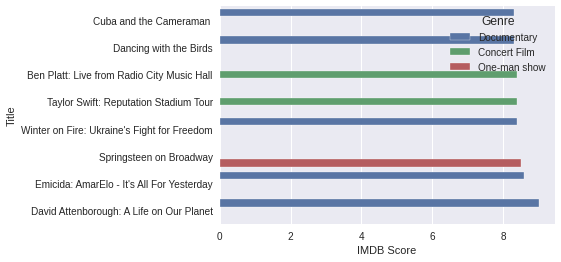

<Figure size 432x432 with 0 Axes>

In [ ]:
movies_score = df[df['IMDB Score']>=8.3]
sns.barplot(x = 'IMDB Score', y = 'Title',hue= 'Genre', data = movies_score)
plt.figure(figsize = (6,6))

Shape of your Data Set loaded: (584, 6)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  3
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    6 Predictors classified...
        This does not include the Target column(s)
        4 variables removed since they were ID or low-information variables


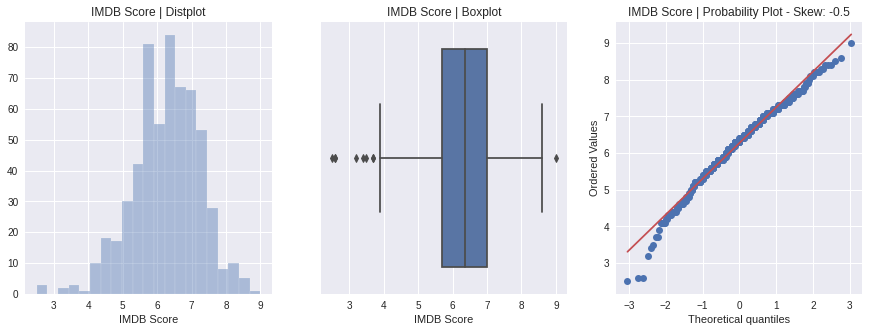

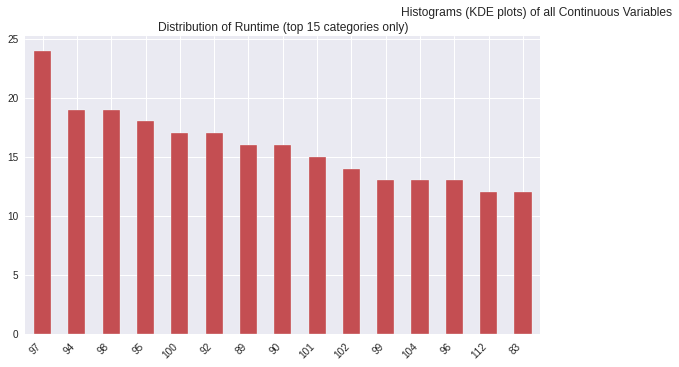

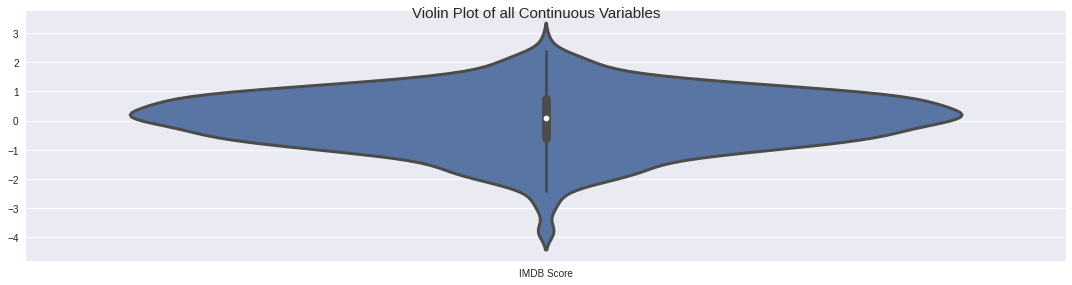

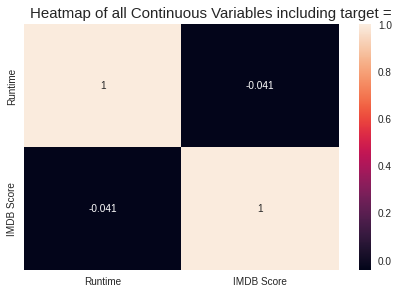

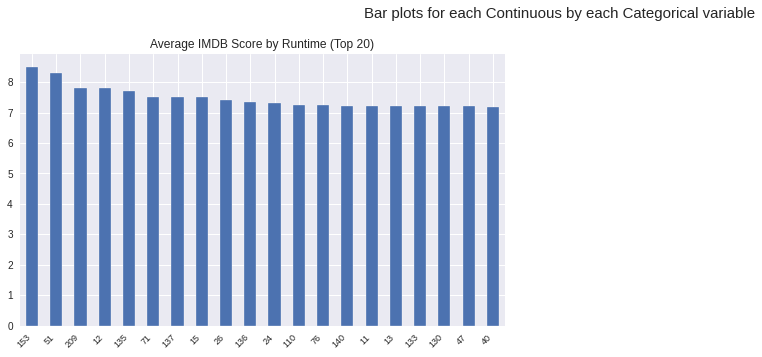

Time to run AutoViz (in seconds) = 2.350

 ###################### VISUALIZATION Completed ########################


,Runtime,IMDB Score
0,58,2.5
1,81,2.6
2,79,2.6
3,94,3.2
4,90,3.4
...,...,...
579,125,8.4
580,91,8.4
581,153,8.5
582,89,8.6


In [ ]:
AV.AutoViz('/content/NetflixOriginals.csv')

By using autoviz we can visualize imdb score and run time even better way

In [ ]:
By using autoviz we can visualize imdb score and run time even better way

Here EDA completes.it is useful for further processing.